# **Part 1: Dataset Creation**

Research Question: What socioeconomic factors are most influential on family income?

Response Variable: "coninc" (Family Income in Constant Dollars)

Explanatory Variables: "race" (White, Black, or Other), "hompop" (Household Size), "degree" (highest level of education)


In [7]:
#Read in csv and filter to only contain response and explanatory variables
import pandas as pd
#
var_list = ['coninc', 'degree', 'hompop' ,'race', 'year'] # List of variables to save
output_file = 'raw_gss_data_url.csv' # Name of the file to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode
    k =+ 1

https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
   Unnamed: 0  year  id            wrkstat  hrs1  hrs2 evwork    occ  \
0           1  1972   1  working full time   NaN   NaN    NaN  205.0   
1           2  1972   2            retired   NaN   NaN    yes  441.0   
2           3  1972   3  working part time   NaN   NaN    NaN  270.0   
3           4  1972   4  working full time   NaN   NaN    NaN    1.0   
4           5  1972   5      keeping house   NaN   NaN    yes  385.0   

   prestige        wrkslf  ...  instype02  instype03  instype04  \
0      50.0  someone else  ...        NaN        NaN        NaN   
1      45.0  someone else  ...        NaN        NaN        NaN   
2      44.0  someone else  ...        NaN        NaN        NaN   
3      57.0  someone else  ...        NaN        NaN        NaN   
4      40.0  someone else  ...        NaN        NaN        NaN   

   totalincentive  wtssps_nea  wtssnrps_nea  wtssps_next  wtssnrps_next  \
0             NaN         NaN       

In [ ]:
#Read in csv
df = pd.read_csv('/content/raw_gss_data_url.csv')
df.head(10)

# **Part 2: Dataset Cleaning**




In [51]:
#Clean Dataset
df.info()
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72426 entries, 0 to 72425
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   coninc  64949 non-null  object
 1   degree  72230 non-null  object
 2   hompop  68388 non-null  object
 3   race    72319 non-null  object
 4   year    72426 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


0         25926.0
1         33333.0
2         33333.0
3         41667.0
4         69444.0
           ...   
72421     18480.0
72422     45360.0
72423     94080.0
72424    107520.0
72425     67200.0
Name: coninc, Length: 72426, dtype: object
There are 7477 missing values
There are 0 missing values


<Axes: >

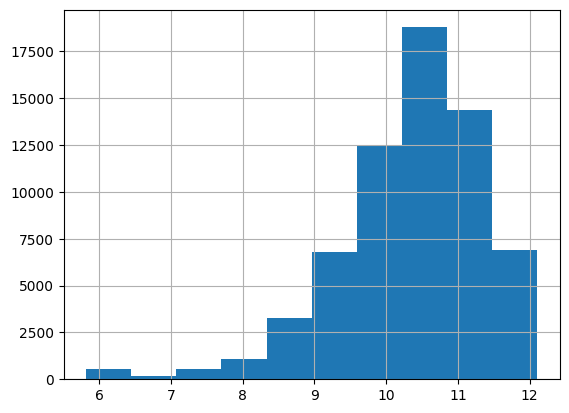

In [52]:
#Clean 'coninc' variable - quantitative
print(df['coninc'])

num_null = df['coninc'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['coninc'])

num_null = df['coninc'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop values that are equal to 'coninc
df = df[df['coninc'] != 'coninc']

#Convert the type to numeric
df['coninc'] = pd.to_numeric(df['coninc'])

#Transform response with log
df['coninc_log'] = np.log(df['coninc'])

df['coninc_log'].hist()


In [53]:
#Clean 'race' variable - categorical
print(df['race'])

num_null = df['race'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['race'])

num_null = df['race'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['race'].value_counts())

0        white
1        white
2        white
3        white
4        white
         ...  
72421    white
72422    white
72423    white
72424    white
72425    white
Name: race, Length: 64913, dtype: object
There are 74 missing values
There are 0 missing values
white    52039
black     8975
other     3825
Name: race, dtype: int64


In [54]:
#Clean 'degree' variable - categorical
print(df['degree'])

num_null = df['degree'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['degree'])

num_null = df['degree'].isnull().sum()

print(f'There are {num_null} missing values')

print(df['degree'].value_counts())

0                      bachelor's
1           less than high school
2                     high school
3                      bachelor's
4                     high school
                   ...           
72421                 high school
72422                    graduate
72423    associate/junior college
72424                    graduate
72425                    graduate
Name: degree, Length: 64839, dtype: object
There are 114 missing values
There are 0 missing values
high school                 32688
less than high school       12246
bachelor's                  10333
graduate                     5483
associate/junior college     3975
Name: degree, dtype: int64


In [57]:
#Clean 'hompop' variable - quantitative
print(df['hompop'])

num_null = df['hompop'].isnull().sum()

print(f'There are {num_null} missing values')

#Drop missing values from columnn
df = df.dropna(subset = ['hompop'])

num_null = df['hompop'].isnull().sum()

print(f'There are {num_null} missing values')

#convert to numeric
df['hompop'] = pd.to_numeric(df['hompop'])


print(df['hompop'].unique())
print(df['hompop'].value_counts())

0        1.0
1        2.0
2        4.0
3        2.0
4        2.0
        ... 
72421    0.0
72422    0.0
72423    0.0
72424    0.0
72425    0.0
Name: hompop, Length: 61266, dtype: float64
There are 0 missing values
There are 0 missing values
[ 1.  2.  4.  3.  7.  5.  6. 11.  9.  8. 10. 14. 15. 13. 12. 16.  0.]
2.0     19399
1.0     13683
3.0      9894
4.0      8489
5.0      4052
0.0      3076
6.0      1602
7.0       610
8.0       242
9.0       114
10.0       72
11.0       18
12.0        6
13.0        5
14.0        2
15.0        1
16.0        1
Name: hompop, dtype: int64


In [77]:
#Filter dataframe by year - decide on a filter

df['year'].value_counts()

df['year'] = pd.to_numeric(df['year'])

desired_year = 2000

filtered_df = df[df['year'] >= desired_year]
filtered_df.reset_index(drop=True, inplace=True)

print(filtered_df.head(5))

filtered_df.isnull().sum()

filtered_df.info()


    coninc                    degree  hompop   race  year  coninc_log
0   9300.0               high school     1.0  white  2000    9.137770
1  19376.0               high school     1.0  white  2000    9.871790
2  46502.0               high school     1.0  white  2000   10.747251
3  38752.0  associate/junior college     1.0  white  2000   10.564938
4  28418.0               high school     1.0  white  2000   10.254778
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26734 entries, 0 to 26733
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coninc      26734 non-null  float64
 1   degree      26734 non-null  object 
 2   hompop      26734 non-null  float64
 3   race        26734 non-null  object 
 4   year        26734 non-null  int64  
 5   coninc_log  26734 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
#Scatterplots/Boxplots for Explanatory Variables

In [ ]:
#Correlation Coefficients

In [ ]:
#Grouped Kernel Density